# Question 2: Implement a queue with operations Push, Pop, Max, where each operation takes constant time to complete: O(c)

A queue is an abstract data type. It is an ordered colleciton of items. New items are added to the end, whilst old items are removed from the front i.e. the first item in, is the first item out (FIFO).

- `Queue()` - Create new empty queue. Does not require parameters. Returns empty queue.
- `enqueue(item)` - Add item to end of queue. Requires item. Returns nothing.
- `dequeue()` - Remove item from the front the queue and modifu the queue. Does not require parameters. Returns the item.
- `isEmpty()` - Tests whether the queue is empty. Does not require parameters. Returns boolean (True or False).
- `size()` - Returns the number of items (integer) in the queue. Does not require parameters.

Decide which end of the list should be the front and which the rear: 

##### FRONT
Inserting and deleting elements from the front requires O(n) linear complexity which increases with the number of elements in the queue. This is because all of the list elements need to shift one by one every time an item is added or removed from the front of the list:
##### REAR
Assume the rear of the queue is at index position 0 in the list. 
Using enque and deque to add and remove elements: 
- Enqueue will have an O(n) linear complexity, which will increase in direct proportion to the number of items in the queue. 
- Dequeue has a O(1) constant complexity.

It is appropriate to use a new class for implementing a queue. A list is a built-in-data structure that allows use of insert() and pop() functions instead of enqueue() and dequeue(). Both insert()and pop() have O(1) constant complexity. 
- Use the insert() operation to add elements to the rear of the queue instead. Complexity: O(1) 
- Use the pop() operation to remove elements from the front of the queue (the first element added to the list, will be the first element removed). 


Push items: 
[10]
[20, 10]
[-10, 20, 10]
[-20, -10, 20, 10]
The max value at this point is:  20
Pop and print list below:
None
[-20, -10, 20]
None
[-20, -10]
None
[-20]
None
[]


(0.0, 0.5)

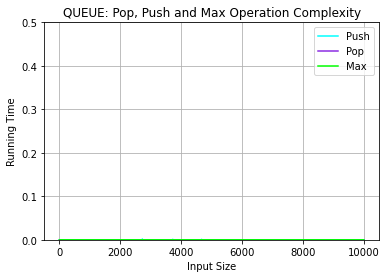

In [16]:
# Assume the rear of the queue is at index position 0 in the list. 
import time
from random import randint
import matplotlib.pyplot as plt
import gc
gc.disable()

class Queue:
    def __init__(self):
          
        # main stack 
        self.mainStack = [] 
      
        # auxiliary stack to help tack the item with max value in the list
        self.auxiliaryStack = []


    def enqueue(self, item):
        self.mainStack.insert(0, item) 
        if (len(self.mainStack) == 1):
            self.auxiliaryStack.insert(0, item) 
            return
   
        if (item > self.auxiliaryStack[0]): # If the current element is greater than the top element of the auxiliary stack,
            self.auxiliaryStack.insert(0, item)  # append the current element to the auxiliary stack
        else:
            self.auxiliaryStack.insert(0, (self.auxiliaryStack[0])) # else append the element at top of the auxiliary stack again into it.
  
    def max(self):
        return self.auxiliaryStack[0]

    def dequeue(self):
        self.mainStack.pop() 
        self.auxiliaryStack.pop()


    def printqlist(self): #operation to print list of all items in stack
        print(self.mainStack) 

q = Queue()
#MANUAL TESTING
print()
print("Push items: ")
q.enqueue(10)
q.printqlist() 
q.enqueue(20) 
q.printqlist() 
q.enqueue(-10) 
q.printqlist() 
q.enqueue(-20) 
q.printqlist() 
print("The max value at this point is: ", q.max())
print("Pop and print list below:")
print(q.dequeue()) 
q.printqlist() 
print(q.dequeue()) 
q.printqlist()
print(q.dequeue()) 
q.printqlist() 
print(q.dequeue()) 
q.printqlist() 


#TEST and plot
list_of_int = 10000
list1 = [randint(0,100) for i in range(list_of_int)] # random integer between 0 to 999.
#TEST PUSH
times_enqueue=[]
for x_enqueue in range(0, list_of_int): 
    start_time = time.time()
    list2 = q.enqueue(list1[:x_enqueue])
    elapsed_time = time.time() - start_time
    times_enqueue.append(elapsed_time)
x_enqueue=[i for i in range(0, list_of_int)]

# #TEST POP
times_dequeue=[]
#prepare a list of numbers for pop test
dequeue_list = Queue() 
for x_dequeue in range(0, 20000):
    dequeue_list.enqueue(randint(0,100))
#run pop test
for x_dequeue in range (0, list_of_int):
    start_time = time.time()
    list2 = dequeue_list.dequeue()
    elapsed_time = time.time() - start_time
    times_dequeue.append(elapsed_time)
x_dequeue=[i for i in range(0, list_of_int)]

# #TEST MAX - this is a terrible test that tests max at the same point multiple times rather than testing at different stages between push and pops. 
times_max=[]
for x_max in range(0, list_of_int):
    start_time = time.time()
    dequeue_list.max()
    elapsed_time = time.time() - start_time
    times_max.append(elapsed_time)
x_max=[i for i in range(0, list_of_int)]

#PLOT GRAPHS
%matplotlib inline
#Name x-axis, y-axis and whole graph
plt.xlabel("Input Size")
plt.ylabel("Running Time")
plt.title("QUEUE: Pop, Push and Max Operation Complexity")
# Plotting all the graphs
plt.plot(x_enqueue, times_enqueue, color="cyan", label = "Push")
plt.plot(x_dequeue, times_dequeue, color="blueviolet", label = "Pop")
plt.plot(x_max, times_max, color="lime", label = "Max")
plt.grid()
plt.legend()
#Load the display window
plt.show
#set y-axis limit
plt.ylim([0, 0.5]) 

#### References
- https://runestone.academy/runestone/books/published/pythonds/BasicDS/WhatIsaQueue.html
- https://wiki.python.org/moin/TimeComplexity
- https://stackify.com/python-garbage-collection/
- https://www.geeksforgeeks.org/queue-in-python/
